<a href="https://colab.research.google.com/github/shaurahsasha/ForecastingEmployeeRetention/blob/main/Forecasting_Employee_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WIE2003 INTRODUCTION TO DATA SCIENCE PROJECT 2

TITLE: FORECASTING EMPLOYEE RETENTION
<br>NAME: SHAURAH BINTI SASHA
<br>MATRICS NO.: 23066257


## PART 1: FILE UPLOAD

File Name: FACTDATA_SEPT2024.TXT
<br>Source: US OPM Website (www.opm.gov)

In [ ]:
#IMPORTS
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving FACTDATA_SEP2024.TXT to FACTDATA_SEP2024.TXT


## PART 2: DATASET INFORMATION


In [ ]:
df = pd.read_csv('FACTDATA_SEP2024.TXT')
df.head()

<ipython-input-17-90aac10feca7>:1: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('FACTDATA_SEP2024.TXT')


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,20,XXXX,2,50,F,1,202409,1,215000.0,21.3
1,AA00,11,J,15,NaN,I,0905,1,ES,ES-**,20,XXXX,2,50,F,1,202409,1,208000.0,31.7
2,AA00,11,K,04,NaN,G,0301,2,99,EX-02,21,XXXX,2,48,F,2,202409,1,221900.0,22.5
3,AA00,11,C,04,12.0,C,0560,2,99,GS-12,10,XXXX,8,10,F,1,202409,1,102506.0,3.0
4,AA00,11,D,04,13.0,C,0905,1,99,GS-13,11,XXXX,8,30,F,1,202409,1,117962.0,3.0


In [ ]:
df.shape

(2313216, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313216 entries, 0 to 2313215
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AGYSUB      object 
 1   LOC         object 
 2   AGELVL      object 
 3   EDLVL       object 
 4   GSEGRD      object 
 5   LOSLVL      object 
 6   OCC         object 
 7   PATCO       int64  
 8   PP          object 
 9   PPGRD       object 
 10  SALLVL      int64  
 11  STEMOCC     object 
 12  SUPERVIS    object 
 13  TOA         object 
 14  WORKSCH     object 
 15  WORKSTAT    int64  
 16  DATECODE    int64  
 17  EMPLOYMENT  int64  
 18  SALARY      float64
 19  LOS         float64
dtypes: float64(2), int64(5), object(13)
memory usage: 353.0+ MB


## PART 3: DATA CLEANING

In [ ]:
df.isnull().sum()

,0
AGYSUB,0
LOC,0
AGELVL,0
EDLVL,2866
GSEGRD,688044
LOSLVL,0
OCC,0
PATCO,0
PP,0
PPGRD,0


In [ ]:
df.duplicated().sum()

np.int64(118164)

In [ ]:
# Original full dataset
df_ori = df.copy()

In [ ]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

,0
AGYSUB,0
LOC,0
AGELVL,0
EDLVL,0
GSEGRD,0
LOSLVL,0
OCC,0
PATCO,0
PP,0
PPGRD,0


In [ ]:
df_cleaned = df.drop_duplicates()
df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
#for col in df_cleaned.columns:
    #unique_vals = df_cleaned[col].unique()
    #print(f"Column: {col}")
    #print(f"Unique Values ({len(unique_vals)}): {unique_vals}")
    #print("-" * 50)

seems like all columns have some kind of unspecified definition. ask chatgpt how to check all columns and make python print it neatly tomorrow rawr. goodnight! 2:04AM 12/5/2025

hi again. i've done it but i would need to refer back to the definitions for the data. for now, we'll just continue with the unique nans. 4:07PM 3/6/2025

## PART 4: CHOOSING FEATURES

In [ ]:
df_cleaned = df_cleaned.drop(columns=['AGYSUB', 'LOC', 'WORKSTAT', 'DATECODE', 'EMPLOYMENT', 'GSEGRD', 'OCC', 'PP', 'PPGRD', 'STEMOCC', 'SUPERVIS'], errors='ignore')

## PART 5: FEATURE ENGINEERING

In [ ]:
df_encoded = df_cleaned.copy()

### PART 5.1: AGELVL

In [ ]:
df_encoded = df_encoded[df_encoded['AGELVL'] != 'Z']

In [ ]:
# Define custom mapping
age_mapping = {
    'A': 0,  # <20
    'B': 1,  # 20-24
    'C': 2,  # 25-29
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10  # 65+
}

df_encoded['AGELVL_ENC'] = df_encoded['AGELVL'].map(age_mapping)

<ipython-input-29-d85fac5f41f0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['AGELVL_ENC'] = df_encoded['AGELVL'].map(age_mapping)


### PART 5.2: EDLVL

In [ ]:
print("Unique values in EDLVL:")
print(df_encoded['EDLVL'].unique())

Unique values in EDLVL:
['13' '15' '04' '17' '08' '10' '07' '09' '21' '18' '20' '12' '11' '14'
 '06' '19' '16' '22' '03' '05' '02' '01' '4.0' '5.0' '13.0' '6.0' '21.0'
 '10.0' '17.0' '11.0' '7.0' '8.0' '14.0' '9.0' '12.0' '18.0' '3.0' '22.0'
 '15.0' '20.0' '16.0' '1.0' '19.0' '2.0' '7' '4' '8' '9' '5' '1' '6' '3'
 '2']


In [ ]:
# Ensure everything is string and remove .0 if it exists
df_encoded['EDLVL'] = df_encoded['EDLVL'].astype(float).astype(int).astype(str).str.zfill(2)

# Drop invalid codes
to_drop = ['**', 'nan'] + [str(i).zfill(2) for i in range(23, 100)]
df_encoded = df_encoded[~df_encoded['EDLVL'].isin(to_drop)]

# Apply mapping
detailed_to_main = {
    '01': 0, '02': 0, '03': 0,       # Less than High School
    '04': 1,                         # High School Diploma
    '05': 2, '06': 2,                # Some College
    '07': 3, '08': 3, '09': 3,       # Associate
    '10': 3, '11': 3, '12': 3,
    '13': 4,                         # Bachelor’s
    '14': 5, '15': 5, '16': 5,       # Post-Bachelor
    '17': 6,                         # Master’s
    '18': 7, '19': 7, '20': 7,       # Post-Master
    '21': 8,                         # Doctorate
    '22': 9                          # Post-Doctorate
}

df_encoded['EDLVL_ENC'] = df_encoded['EDLVL'].map(detailed_to_main)

In [ ]:
print("Any NaNs left?", df_encoded['EDLVL_ENC'].isna().sum())

Any NaNs left? 0


### PART 5.3: PATCO

In [ ]:
df_encoded = df_encoded[df_encoded['PATCO'] != 9]

In [ ]:
# Map PATCO to 0-index
patco_map = {
    1: 0,  # Professional
    2: 1,  # Administrative
    3: 2,  # Technical
    4: 3,  # Clerical
    5: 4,  # Other White Collar
    6: 5   # Blue Collar
}

df_encoded['PATCO_ENC'] = df_encoded['PATCO'].map(patco_map)

### PART 5.4: SALLVL

In [ ]:
# Drop 30 (Unspecified/Zero)
df_encoded = df_encoded[df_encoded['SALLVL'] != 30]

# Map integers: 1 ➜ 0, 2 ➜ 1, ..., 29 ➜ 28
sallvl_map = {i: i - 1 for i in range(1, 30)}

# Encode
df_encoded['SALLVL_ENC'] = df_encoded['SALLVL'].map(sallvl_map)

### PART 5.5: SALARY

In [ ]:
print(df_encoded['SALARY'].isna().sum())         # Count of NaNs
print(np.isinf(df_encoded['SALARY']).sum())      # Count of infinite values (needs `import numpy as np`)

211045
0


In [ ]:
import numpy as np

df_encoded = df_encoded[~df_encoded['SALARY'].isna()]             # Drop NaNs
df_encoded = df_encoded[~np.isinf(df_encoded['SALARY'])]          # Drop inf values

In [ ]:
df_encoded['SALARY'] = df_encoded['SALARY'].astype(int)

In [ ]:
print("Any NaNs left?", df_encoded['SALARY'].isna().sum())

Any NaNs left? 0


### PART 5.6: TOA

In [ ]:
# Drop rows with '**' first
df_encoded = df_encoded[df_encoded['TOA'] != '**']

# Ensure all TOA values are strings
df_encoded['TOA'] = df_encoded['TOA'].astype(str)

# Define sets
perm_codes = {'10', '15', '30', '32', '34', '35', '36', '38', '50', '55'}
non_perm_codes = {'20', '40', '42', '44', '45', '46', '48', '60', '65'}

# Map to 1 (Permanent), 2 (Non-Permanent), else None
def map_toa_numeric(code):
    if code in perm_codes:
        return 1
    elif code in non_perm_codes:
        return 0
    else:
        return None  # To be dropped later

df_encoded['TOA_ENC'] = df_encoded['TOA'].apply(map_toa_numeric)

# Drop any rows where TOA_TYPE is None
df_encoded = df_encoded.dropna(subset=['TOA_ENC'])

### PART 5.7: WORKSCH

In [ ]:
# Drop '*'
df_encoded = df_encoded[df_encoded['WORKSCH'] != '*']

# Define sets
full_time_codes = {'B', 'F', 'G', 'H'}
not_full_time_codes = {'I', 'J', 'P', 'Q', 'R', 'S', 'T'}

# Map to binary
def map_worksch(code):
    if code in full_time_codes:
        return 1
    elif code in not_full_time_codes:
        return 0
    else:
        return None  # just in case

df_encoded['WORKSCH_ENC'] = df_encoded['WORKSCH'].apply(map_worksch)

### PART 5.8: LOSLVL

In [ ]:
# Drop Z
df_encoded = df_encoded[df_encoded['LOSLVL'] != 'Z']

# Mapping
loslvl_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4,
    'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9
}

# Apply mapping
df_encoded['LOSLVL_ENC'] = df_encoded['LOSLVL'].map(loslvl_mapping)

### PART 5.9: LOS

<Axes: xlabel='LOS'>

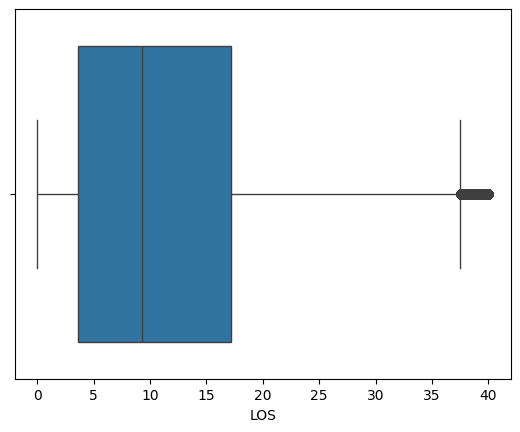

In [ ]:
import seaborn as sns
sns.boxplot(data=df_encoded, x='LOS')

In [ ]:
# Remove extreme outliers > 40 years
df_encoded = df_encoded[df_encoded['LOS'] <= 40]

## PART 6: CORRELATION

In [ ]:
# Step 1: Create a copy to preserve all columns
df_full = df_encoded.copy()

# Step 2: Create a clean version for ML
df_full = df_full.drop(columns=[
    'AGELVL', 'EDLVL', 'PATCO', 'SALLVL', 'TOA', 'WORKSCH', 'LOSLVL',
])

# Optional: Rename encoded columns
df_full = df_full.rename(columns={
    'AGELVL_ENC': 'AGELVL',
    'EDLVL_ENC': 'EDLVL',
    'PATCO_ENC': 'PATCO',
    'SALLVL_ENC': 'SALLVL',
    'TOA_ENC': 'TOA',
    'WORKSCH_ENC': 'WORKSCH',
    'LOSLVL_ENC': 'LOSLVL',
})

           SALARY       LOS    AGELVL     EDLVL     PATCO    SALLVL       TOA  \
SALARY   1.000000  0.326229  0.239650  0.444927 -0.484730  0.984600  0.086758   
LOS      0.326229  1.000000  0.517313  0.045852 -0.102737  0.357529  0.165363   
AGELVL   0.239650  0.517313  1.000000  0.047853 -0.051820  0.250576  0.064062   
EDLVL    0.444927  0.045852  0.047853  1.000000 -0.528947  0.465081 -0.000626   
PATCO   -0.484730 -0.102737 -0.051820 -0.528947  1.000000 -0.504248 -0.026483   
SALLVL   0.984600  0.357529  0.250576  0.465081 -0.504248  1.000000  0.093119   
TOA      0.086758  0.165363  0.064062 -0.000626 -0.026483  0.093119  1.000000   
WORKSCH  0.002836  0.081335 -0.032194  0.021015 -0.033826  0.030997  0.341118   
LOSLVL   0.336798  0.975901  0.516027  0.055113 -0.108329  0.368462  0.187518   

          WORKSCH    LOSLVL  
SALARY   0.002836  0.336798  
LOS      0.081335  0.975901  
AGELVL  -0.032194  0.516027  
EDLVL    0.021015  0.055113  
PATCO   -0.033826 -0.108329  
SALLVL   

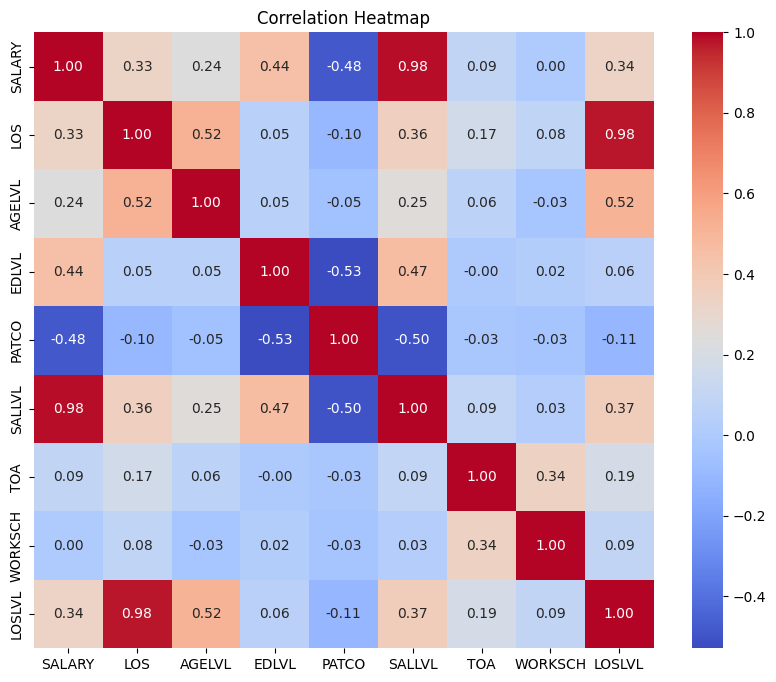

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (only numerical columns)
corr_matrix = df_full.corr(numeric_only=True)

# Print correlation matrix
print(corr_matrix)

# Optional: heatmap for nicer visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## PART 7: MODELLING

In [ ]:
df_full.isna().sum()

,0
SALARY,0
LOS,0
AGELVL,0
EDLVL,0
PATCO,0
SALLVL,0
TOA,0
WORKSCH,0
LOSLVL,0


### PART 7.1: LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_full.drop('LOS', axis=1)
y = df_full['LOS']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% train, 20% test
)

# Check sizes
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (1556925, 8)
Testing set: (389232, 8)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")
print(f"Train R²:   {train_r2:.4f}")
print(f"Test R²:    {test_r2:.4f}")

Train RMSE: 2.0556
Test RMSE:  2.0571
Train R²:   0.9531
Test R²:    0.9529


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}")

Cross-Validated R² Scores: [0.95171834 0.9554764  0.95480269 0.95817816 0.92426479]
Mean CV R²: 0.9489


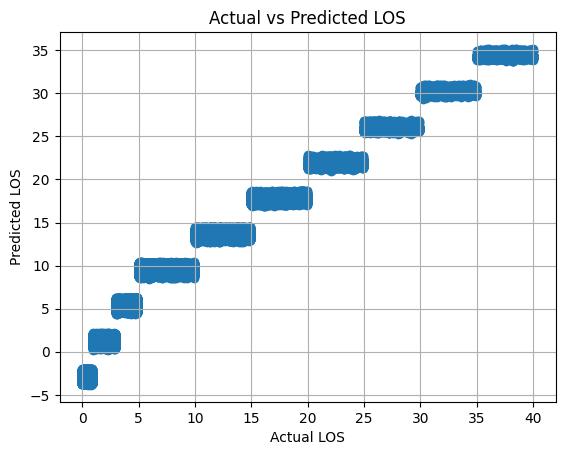

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual LOS")
plt.ylabel("Predicted LOS")
plt.title("Actual vs Predicted LOS")
plt.grid(True)
plt.show()

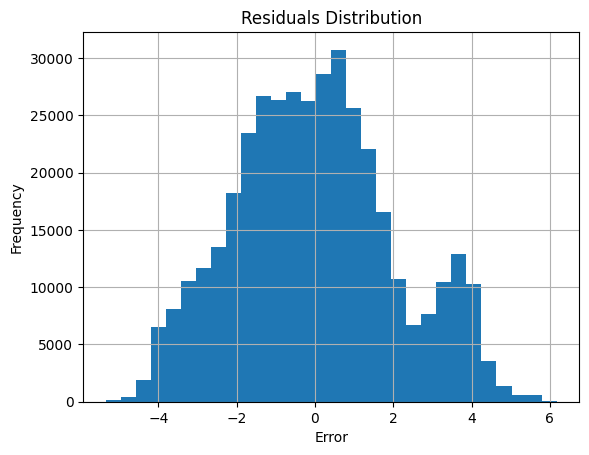

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

ehhh so far linear regression looks okay? good sign.
<br>now i need to do other saimenzz. huzz hustling, huzzling 💅
<br>7:41PM 4/6/2025 xx,shaushau

### PART 7.2: SECOND MODEL???

## PART 8: FORECASTING DASHBOARD??